<a href="https://colab.research.google.com/github/jimmydev88/MachineLearning/blob/main/los_mtmh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regression

## Importing the libraries

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
sns.set()

## Importing the dataset

In [121]:
dataset = pd.read_csv('datamtmh1.csv')
dataset

,Umur,Class,TOTALRS,DIAGNOSA1,DIAGNOSA2,LOS
0,59.0,III,42116633.79,I25.1,0,3
1,55.0,II,49029728.86,I25.1,0,3
2,62.0,II,58691716.79,I21.9,E11.9,2
3,60.0,I,56115107.25,I21.1,0,3
4,59.0,I,50127856.80,I25.0,0,2
...,...,...,...,...,...,...
505,NaN,I,55204688.01,I20.0,I10,3
506,NaN,I,83083621.98,I21.1,0,4
507,NaN,III,69933426.96,I21.0,E11.9,14
508,NaN,I,63898232.46,I21.9,0,4


##Missing Values

In [122]:
dataset['Umur'].fillna((dataset['Umur'].mean()), inplace=True)

In [123]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Umur       510 non-null    float64
 1   Class      510 non-null    object 
 2   TOTALRS    510 non-null    float64
 3   DIAGNOSA1  510 non-null    object 
 4   DIAGNOSA2  510 non-null    object 
 5   LOS        510 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 24.0+ KB


In [124]:
df = dataset.copy()
df.describe(include='all')
df[df['LOS']<11]

,Umur,Class,TOTALRS,DIAGNOSA1,DIAGNOSA2,LOS
0,59.000000,III,42116633.79,I25.1,0,3
1,55.000000,II,49029728.86,I25.1,0,3
2,62.000000,II,58691716.79,I21.9,E11.9,2
3,60.000000,I,56115107.25,I21.1,0,3
4,59.000000,I,50127856.80,I25.0,0,2
...,...,...,...,...,...,...
504,56.027254,I,66483133.71,I21.9,0,5
505,56.027254,I,55204688.01,I20.0,I10,3
506,56.027254,I,83083621.98,I21.1,0,4
508,56.027254,I,63898232.46,I21.9,0,4


##Remove Outlier

In [125]:
df_wo_outlier = df[df['LOS'] < 11]
df_wo_outlier.describe(include='all')

,Umur,Class,TOTALRS,DIAGNOSA1,DIAGNOSA2,LOS
count,508.000000,508,5.080000e+02,508,508,508.000000
unique,NaN,3,NaN,12,9,NaN
top,NaN,I,NaN,I25.1,0,NaN
freq,NaN,223,NaN,121,411,NaN
mean,56.021402,NaN,5.711203e+07,NaN,NaN,3.793307
std,8.633428,NaN,1.007002e+07,NaN,NaN,1.061517
min,29.000000,NaN,3.972719e+07,NaN,NaN,1.000000
25%,50.000000,NaN,4.949981e+07,NaN,NaN,3.000000
50%,56.027254,NaN,5.472029e+07,NaN,NaN,4.000000
75%,62.000000,NaN,6.302182e+07,NaN,NaN,4.000000


In [126]:
X = df_wo_outlier[['Umur']]
y = df_wo_outlier['LOS']
f_regression(X,y)
p_values = f_regression(X,y)[1]
p_values

array([0.79])

In [127]:
le = LabelEncoder()

In [128]:
diag1_lst = df_wo_outlier.loc[:,'DIAGNOSA1'].unique()
diag1_lst.sort()
diag1_dict = dict(zip(diag1_lst, range(len(diag1_lst))))
df_wo_outlier.DIAGNOSA1.replace(diag1_dict, inplace=True)

diag2_lst = df_wo_outlier.loc[:,'DIAGNOSA2'].unique()
diag2_lst.sort()
diag2_dict = dict(zip(diag2_lst, range(len(diag2_lst))))
df_wo_outlier.DIAGNOSA2.replace(diag2_dict, inplace=True)

class_lst = df_wo_outlier.loc[:,'Class'].unique()
class_lst.sort()
class_dict = dict(zip(class_lst, range(len(class_lst))))
df_wo_outlier.Class.replace(class_dict, inplace=True)
    

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [129]:
df_wo_outlier

,Umur,Class,TOTALRS,DIAGNOSA1,DIAGNOSA2,LOS
0,59.000000,2,42116633.79,10,0,3
1,55.000000,1,49029728.86,10,0,3
2,62.000000,1,58691716.79,5,2,2
3,60.000000,0,56115107.25,3,0,3
4,59.000000,0,50127856.80,9,0,2
...,...,...,...,...,...,...
504,56.027254,0,66483133.71,5,0,5
505,56.027254,0,55204688.01,0,3,3
506,56.027254,0,83083621.98,3,0,4
508,56.027254,0,63898232.46,5,0,4


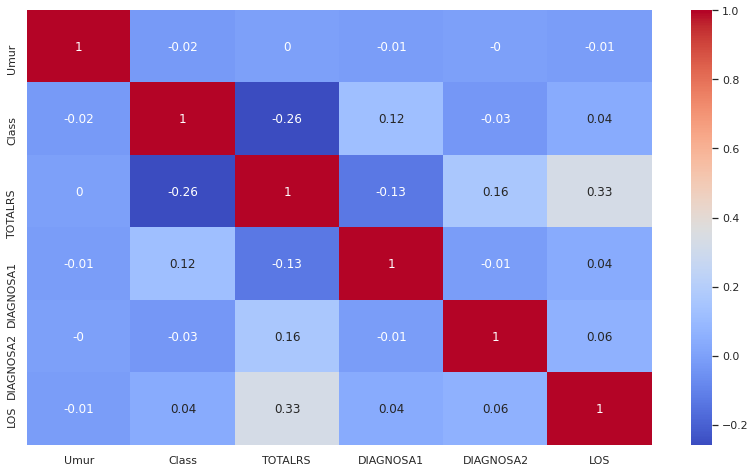

In [130]:
plt.figure(figsize=(14, 8))
corr_matrix = df_wo_outlier.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

In [142]:
X = df_wo_outlier.loc[:,('Umur', 'Class', 'DIAGNOSA1', 'DIAGNOSA2')]
y = df_wo_outlier.loc[:,'LOS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = RandomForestRegressor(n_estimators =740, bootstrap= True, max_features= 0.5, min_samples_leaf= 4, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=740, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

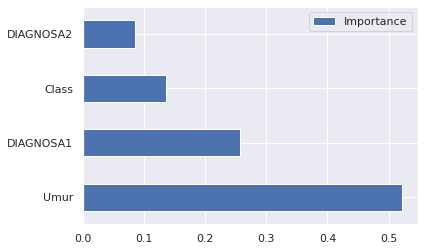

In [133]:
def feat_importance(m,df_train):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=df_train.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)
importance = feat_importance(regressor,X_train)
importance[:]
importance.plot(kind='barh')

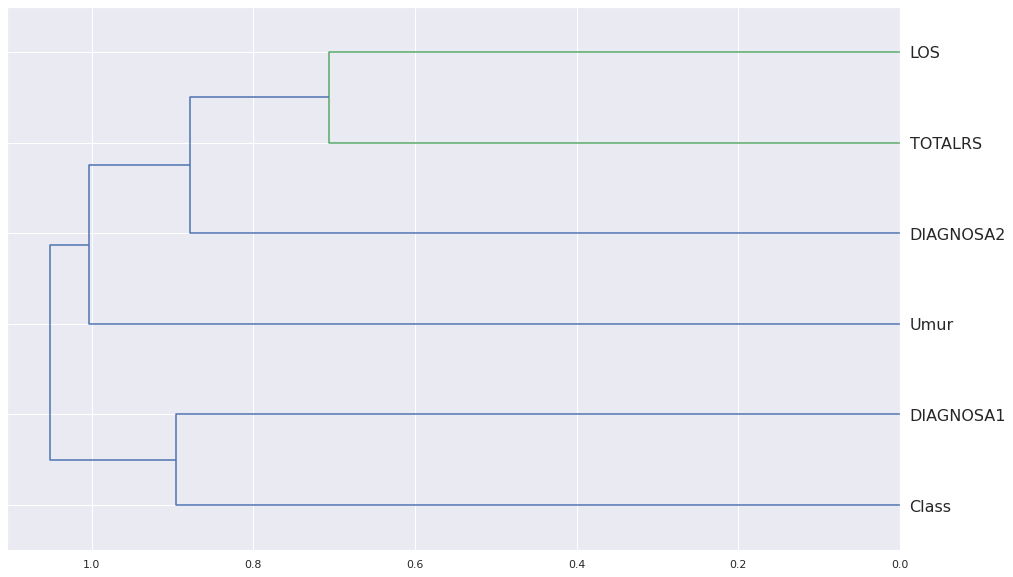

In [135]:
import scipy
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(df_wo_outlier).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed,method='average')
fig = plt.figure(figsize=(16,10))
dendogram = hc.dendrogram(z,labels=df_wo_outlier.columns,orientation='left',leaf_font_size=16)
plt.show()

In [138]:
n_estimators = [int(x) for x in np.arange(start = 10, stop = 2000, step = 10)]
max_features = [0.5,'auto', 'sqrt','log2']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [139]:
from sklearn.model_selection import RandomizedSearchCV
# First create the base model to tune
m = RandomForestRegressor()
# Fit the random search model
m_random = RandomizedSearchCV(estimator = m, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
m_random.fit(X_train, y_train)
m_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.4min finished


{'bootstrap': True,
 'max_features': 0.5,
 'min_samples_leaf': 4,
 'n_estimators': 740}

In [143]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)


In [144]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.044820283934785765

In [145]:
print(y_pred)

[3.94 3.3  3.92 3.91 3.94 3.92 3.59 3.3  3.73 3.94 3.85 4.24 4.51 3.71
 3.9  4.08 3.38 3.86 3.57 4.2  3.59 3.97 3.62 4.2  3.71 3.87 3.61 4.35
 3.77 3.48 3.96 4.29 3.84 3.82 3.92 4.26 3.34 4.02 3.78 3.85 3.37 3.61
 3.4  3.72 3.53 3.29 3.77 3.78 3.75 4.14 3.28 3.49 3.86 3.72 3.31 3.96
 4.11 3.61 3.57 3.82 3.8  3.91 4.27 3.65 3.68 3.18 4.02 3.97 3.32 3.76
 3.76 4.21 3.37 3.67 3.77 3.78 3.6  3.65 4.55 4.15 4.17 3.89 3.37 4.37
 4.46 3.72 4.01 3.64 4.02 3.93 4.15 3.67 3.74 4.06 3.33 3.89 3.48 4.54
 3.47 3.63 3.91 3.92]
